**Applied Learning Assignment 1:**

Advanced Cholesterol Distribution Plot:

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
df = pd.read_csv("/content/heart_attack_south_africa (1).csv")

In [3]:
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264.0,141.0,65.0,0.0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150.0,81.0,42.0,0.0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220.0,124.0,70.0,1.0
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141.0,56.0,38.0,1.0
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221.0,186.0,26.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58886 entries, 0 to 58885
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_ID                    58886 non-null  int64  
 1   Age                           58886 non-null  int64  
 2   Gender                        58886 non-null  object 
 3   Cholesterol_Level             58886 non-null  int64  
 4   Blood_Pressure_Systolic       58886 non-null  int64  
 5   Blood_Pressure_Diastolic      58886 non-null  int64  
 6   Smoking_Status                58886 non-null  object 
 7   Alcohol_Intake                58886 non-null  object 
 8   Physical_Activity             58886 non-null  object 
 9   Obesity_Index                 58886 non-null  float64
 10  Diabetes_Status               58885 non-null  object 
 11  Family_History_Heart_Disease  58885 non-null  object 
 12  Diet_Quality                  58885 non-null  object 
 13  S

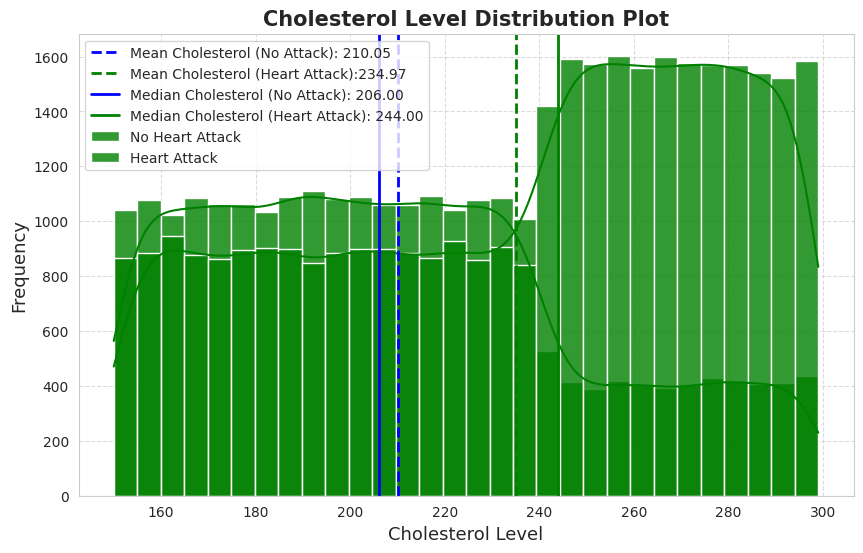

In [7]:
# Calculate mean and median cholesterol levels based on heart attack outcome
mean_chol_no_attack = df[df['Heart_Attack_Outcome'] == 0]['Cholesterol_Level'].mean()
mean_chol_attack = df[df['Heart_Attack_Outcome'] == 1]['Cholesterol_Level'].mean()

median_chol_no_attack = df[df['Heart_Attack_Outcome'] == 0]['Cholesterol_Level'].median()
median_chol_attack = df[df['Heart_Attack_Outcome'] == 1]['Cholesterol_Level'].median()

# Set Seaborn style (Seaborn)
sns.set_style("whitegrid") # This applies a polished white-grid background to the plot
# Create figure and axis (Matplotlib)
plt.figure(figsize=(10, 6)) # Set figure size using Matplotlib

# Seaborn histogram with KDE (Seaborn)
sns.histplot(df[df['Heart_Attack_Outcome'] == 0]['Cholesterol_Level'],
             kde=True, color='green',bins=30, alpha=0.8, label='No Heart Attack')

sns.histplot(df[df['Heart_Attack_Outcome'] == 1]['Cholesterol_Level'],
             kde=True, color='green', bins=30, alpha=0.8, label='Heart Attack')

# Add mean and median lines for each group (Matplotlib)
plt.axvline(mean_chol_no_attack, color='blue', linestyle='--', linewidth=2,
            label=f"Mean Cholesterol (No Attack): {mean_chol_no_attack:.2f}") # Mean line for No Heart Attack
plt.axvline(mean_chol_attack, color='green', linestyle='--', linewidth=2,
            label=f"Mean Cholesterol (Heart Attack):{mean_chol_attack:.2f}") # Mean line for HeartAttack

plt.axvline(median_chol_no_attack, color='blue', linestyle='-', linewidth=2,
            label=f"Median Cholesterol (No Attack): {median_chol_no_attack:.2f}") # Median line for No Heart Attack
plt.axvline(median_chol_attack, color='green', linestyle='-', linewidth=2,
            label=f"Median Cholesterol (Heart Attack): {median_chol_attack:.2f}") # Median line for Heart Attack

# Matplotlib Customization (Matplotlib)
plt.title("Cholesterol Level Distribution Plot",
          fontsize=15, fontweight="bold") # Set title
plt.xlabel("Cholesterol Level", fontsize=13) # X-axis label
plt.ylabel("Frequency", fontsize=13) # Y-axis label
plt.legend() # Display the legend for mean and median lines
plt.grid(True, linestyle="--", alpha=0.7) # Add grid with dashed lines and transparency

# Show the plot (Matplotlib)
plt.show() # Display the plot

**Overlaying Line and Scatter Plots:**

/tmp/ipython-input-536824991.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diabetes_Status",


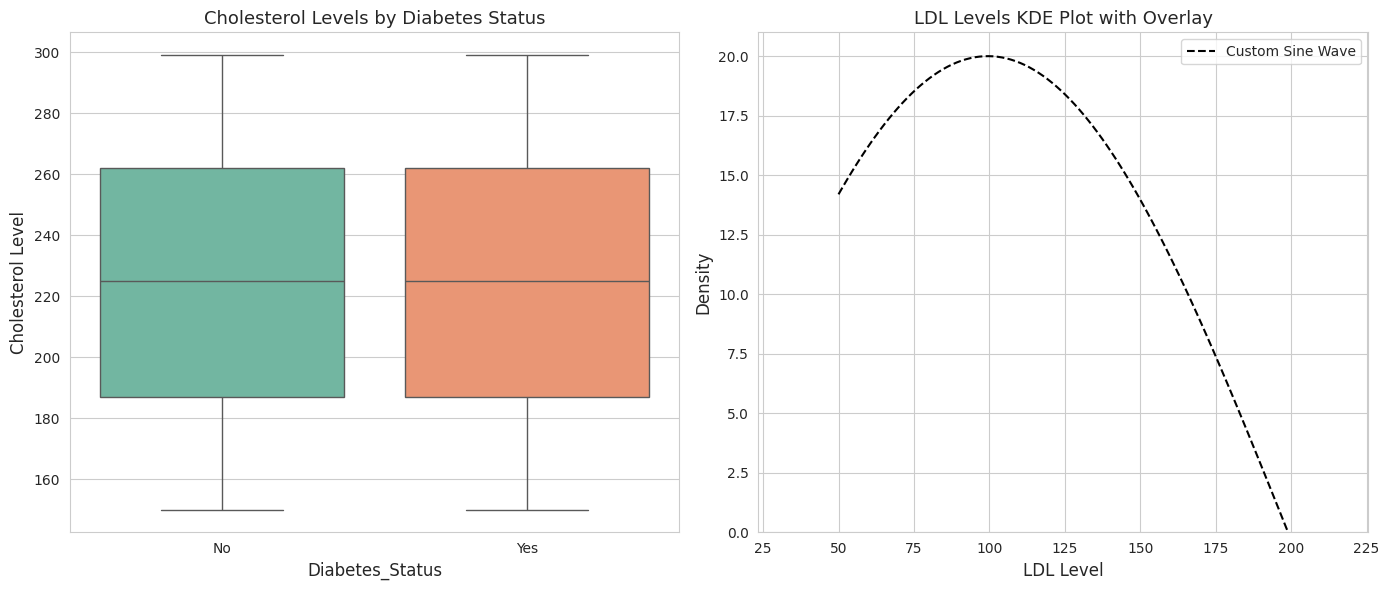

In [10]:
# Create subplots with two axes (Matplotlib)
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns of plots

# ========= Seaborn Boxplot (First Plot) ========
# Boxplot for Cholesterol Level across Diabetes Status (Seaborn)
sns.boxplot(data=df, x="Diabetes_Status",
            y="Cholesterol_Level", ax=ax[0], palette="Set2")

# Matplotlib customization (First Axis)
ax[0].set_title("Cholesterol Levels by Diabetes Status",
                fontsize=13)
ax[0].set_xlabel("Diabetes_Status", fontsize=12)
ax[0].set_ylabel("Cholesterol Level", fontsize=12)

# Seaborn KDE Plot with Matplotlib Line (Second Plot)
# Kernel Density Estimation (KDE) Plot for LDL Level based on Heart Attack Outcome (Seaborn)
sns.kdeplot(data=df, x="LDL_Level",
            hue="Heart_Attack_Outcome", fill=True, alpha=0.4, ax=ax[1])

# Overlay Matplotlib sine wave for illustration (Matplotlib)
x = np.linspace(df["LDL_Level"].min(),
df["LDL_Level"].max(), 100)
y = np.sin(x / max(x) * np.pi) * 20 # Normalizing x and scaling sine wave
ax[1].plot(x, y, color="black", linestyle="--", label="Custom Sine Wave")

# Matplotlib customization (Second Axis)
ax[1].set_title("LDL Levels KDE Plot with Overlay",
                fontsize=13)
ax[1].set_xlabel("LDL Level", fontsize=12)
ax[1].set_ylabel("Density", fontsize=12)
ax[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Creating Multi-Axes Plots:**

/tmp/ipython-input-2029570399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Gender",


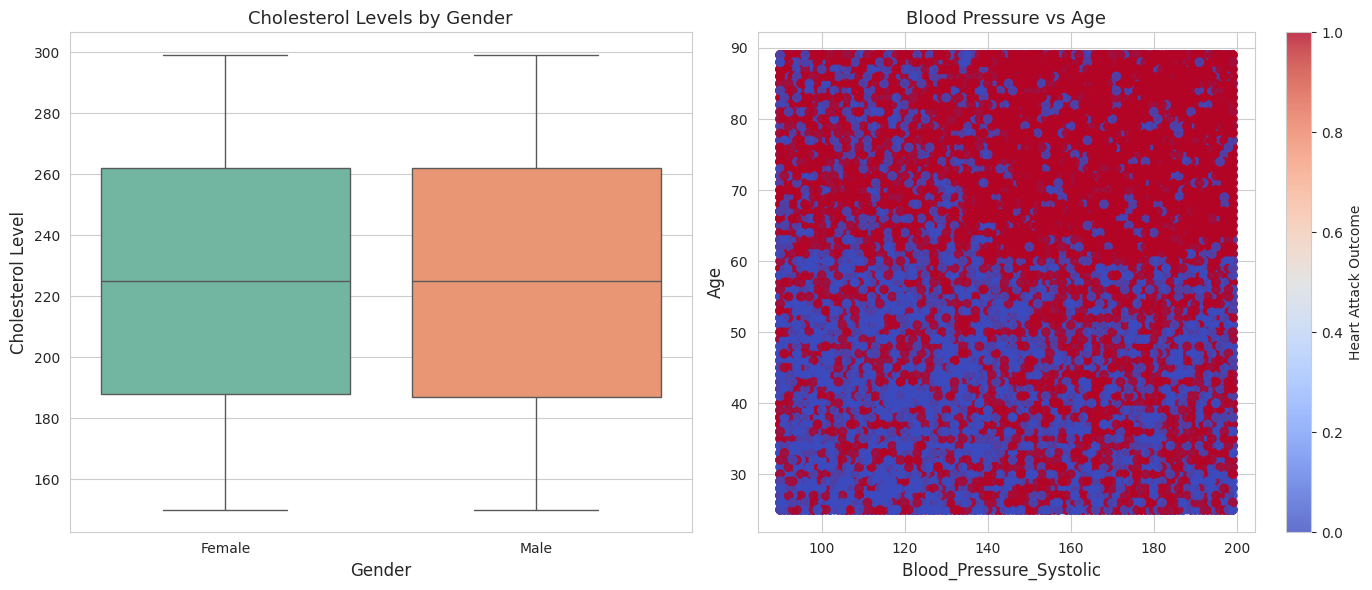

In [11]:
# Create a figure with two subplots (Matplotlib)
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns

# Seaborn Boxplot (First Axis)
# Boxplot for Cholesterol Level across Gender (Seaborn)
sns.boxplot(data=df, x="Gender",
            y="Cholesterol_Level", ax=ax[0], palette="Set2")

# Matplotlib customization (First Axis)
ax[0].set_title("Cholesterol Levels by Gender",
                fontsize=13)
ax[0].set_xlabel("Gender", fontsize=12)
ax[0].set_ylabel("Cholesterol Level", fontsize=12)

# Scatter plot for Blood Pressure vs Age (Matplotlib)
sc = ax[1].scatter(df["Blood_Pressure_Systolic"], df["Age"],
                   c=df["Heart_Attack_Outcome"], cmap="coolwarm", alpha=0.8)

# Matplotlib customization (Second Axis)
ax[1].set_title("Blood Pressure vs Age", fontsize=13)
ax[1].set_xlabel("Blood_Pressure_Systolic  ", fontsize=12)
ax[1].set_ylabel("Age", fontsize=12)

# Add colorbar for better visualization
cbar = fig.colorbar(sc, ax=ax[1])
cbar.set_label("Heart Attack Outcome")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Combining Seaborn’s FacetGrid and Matplotlib:**

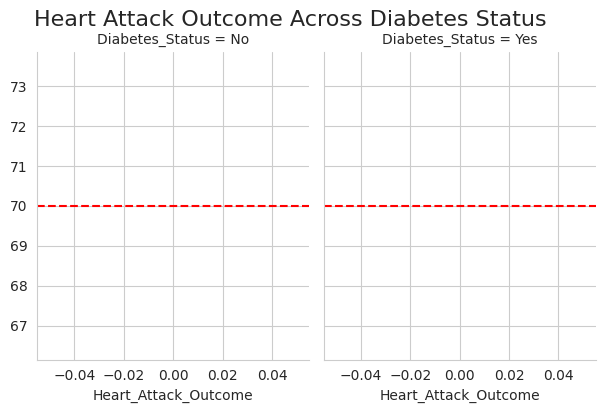

In [15]:
# Create a FacetGrid to plot scatter plots for different Diabetes Status categories
g = sns.FacetGrid(df, col="Diabetes_Status",
height=4, aspect=0.8)

# Map Seaborn scatter plots onto the grid (Seaborn)
g.map(sns.scatterplot, "Heart_Attack_Outcome",
      alpha=0.8)

# ====Matplotlib Customization (Annotations)

# Add custom horizontal reference lines (Matplotlib)
for ax in g.axes.flat:
  ax.axhline(y=70, color="red", linestyle="--",
           label="Heart Attack Outcome") # Reference line

# Add a title to the entire figure (Matplotlib)
g.fig.suptitle("Heart Attack Outcome Across Diabetes Status",
               y=1.02, fontsize=16)

# Show the final plot
plt.show()

**Advanced Bar Chart with Seaborn and Matplotlib:**

/tmp/ipython-input-2574306018.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


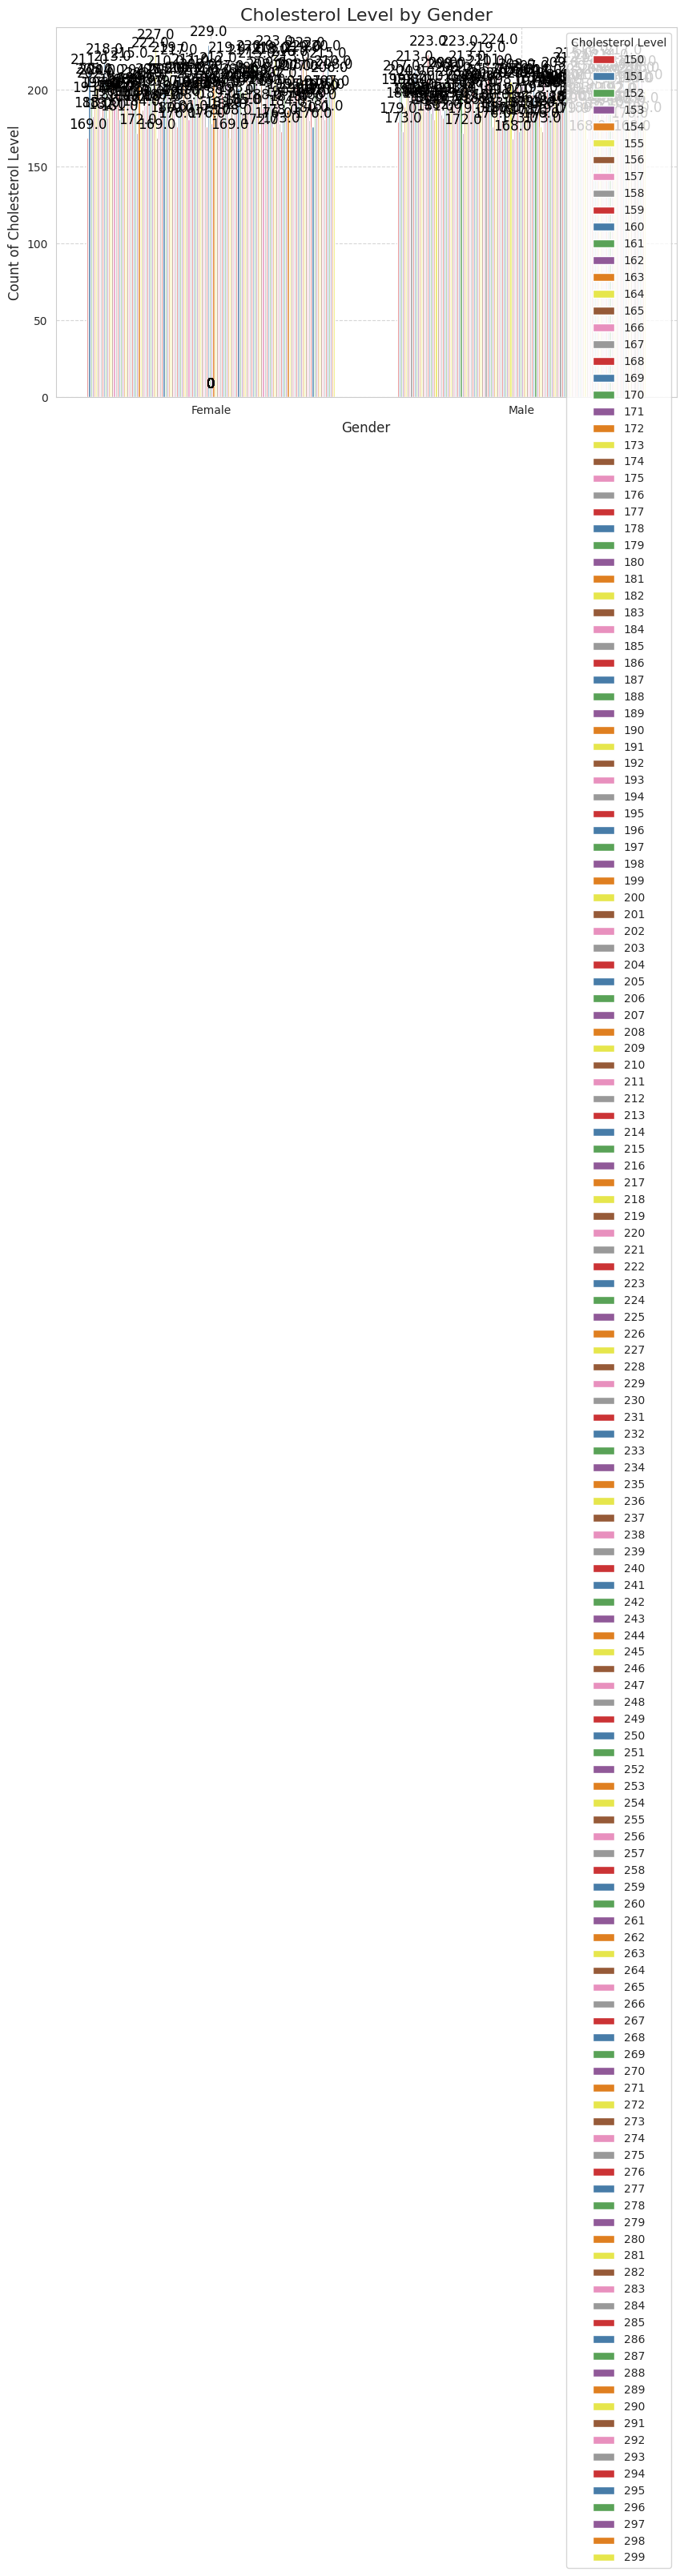

In [17]:
# Check for any missing values in the relevant columns
df.dropna(subset=['Gender', 'Cholesterol_Level'],
inplace=True)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the Seaborn barplot
sns.countplot(x="Gender", hue="Cholesterol_Level",
data=df, palette="Set1", ax=ax)

# Customize the plot using Matplotlib
ax.set_title("Cholesterol Level by Gender", fontsize=16)
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Count of Cholesterol Level", fontsize=12)

# Add grid lines to make the plot more readable
ax.grid(True, linestyle='--', alpha=0.8)

# Annotate each bar with the count of occurrences
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
            xytext=(0, 5), textcoords="offset points",
            ha='center', va='bottom', fontsize=12, color='black')

# Add a legend with a custom location
ax.legend(title="Cholesterol Level", loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()